Importing libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling

import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import warnings


Read dataset

In [30]:
df = pd.read_csv("data/stud.csv")
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Creating x and y variable

In [36]:
x = df.drop(columns = "math_score",axis = 1)
y = df["math_score"]

     gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  reading_score  writing_score  
0                      none             72             74  
1              

In [32]:
# Create column transformer with 2 type of transformer

num_features  = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [42]:
# x = pd.DataFrame(x)
# x = preprocessor.fit_transform(x)
x



array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

Splitting dataset into training and test dataset

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Create an evaluation model to give all metric after model training

In [59]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square


In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

In [62]:
for i in range(len(models)):
    model = list(models.values())[i]
    print(model)
    # Train model
    model.fit(x_train,y_train)
    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    # Evaluate model
    model_train_mae,model_train_rsme,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rsme,model_test_r2 = evaluate_model(y_test,y_test_pred)

    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

    print(list(models.keys())[i])
    print("Model Performance of training set")
    print(f"Root mean square error : {model_train_rsme}")
    print(f"Mean absolute error : {model_train_mae}")
    print(f"R2 score : {model_train_r2}")

    print("----------------------------------")

    print("Model Performance of test set")
    print(f"Root mean square error : {model_test_rsme}")
    print(f"Mean absolute error : {model_test_mae}")
    print(f"R2 score : {model_test_r2}")

    print("="*30)
    print("\n")

LinearRegression()
Linear Regression
Model Performance of training set
Root mean square error : 5.32433097827426
Mean absolute error : 4.26708984375
R2 score : 0.8742567465397689
----------------------------------
Model Performance of test set
Root mean square error : 5.3959872842671395
Mean absolute error : 4.2158203125
R2 score : 0.8803449074540941


Lasso()
Lasso
Model Performance of training set
Root mean square error : 6.593815587795566
Mean absolute error : 5.206302661246526
R2 score : 0.8071462015863456
----------------------------------
Model Performance of test set
Root mean square error : 6.519694535667419
Mean absolute error : 5.157881810347763
R2 score : 0.8253197323627853


Ridge()
Ridge
Model Performance of training set
Root mean square error : 5.323324922741654
Mean absolute error : 4.264987823725981
R2 score : 0.8743042615212909
----------------------------------
Model Performance of test set
Root mean square error : 5.39038701693564
Mean absolute error : 4.211100688014

Training model and r2_score

In [63]:
combined = pd.DataFrame(list(zip(model_list,r2_list)), columns = ["Training Models","R2 score"]).sort_values(by = "R2 score",ascending = False)
combined

,Training Models,R2 score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.852683
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849811
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.727376


We will select Linear Regression to train the model as it is having the highest r2 score

In [66]:
Linear_Regressor = LinearRegression()
Linear_Regressor.fit(x_train,y_train)
y_pred = Linear_Regressor.predict(x_test)
score = r2_score(y_test,y_pred)
print(f"Accuracy of this model is : {round(score*100,2)}%")

Accuracy of this model is : 88.03%


Scatter plot of actual and predicted values

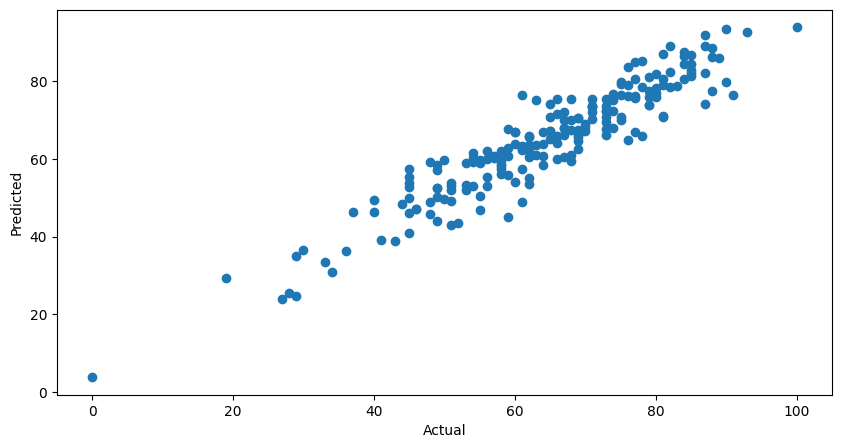

In [76]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Scatter plot with regression line

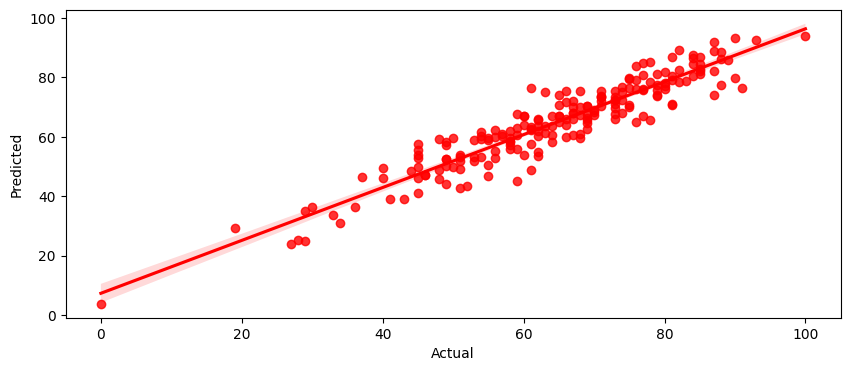

In [79]:
fig = plt.figure(figsize=(10,4))
sns.regplot(x=y_test,y = y_pred, color='r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [69]:
pred_values = pd.DataFrame({"Actual Values": y_test,"Predicted Values":y_pred,"Difference":y_test-y_pred})
pred_values

,Actual Values,Predicted Values,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
